# Probability Density Functions

In the previous chapter, we modeled empirical distributions with theoretical distributions including the binomial, Poisson, exponential, and normal distributions.

The binomial and Poisson distributions are **discrete**, which means that the outcomes have to be distinct or separate elements, like an integer number of hits and misses, or goals scored.
In a discrete distribution, each outcome is associated with a probability mass.

The exponential and normal distribution are **continuous**, which means the outcomes can be locations on a spectrum -- like a wavelength -- or ratios -- like height and weight, which are ratios relative to their units of measure.
In a discrete distribution, each outcome is associated with a **probability density**.
To understand probability density, let's start by comparing distributions.

[Click here to run this notebook on Colab](https://colab.research.google.com/github/AllenDowney/ThinkStats/blob/v3/nb/chap06.ipynb).

In [1]:
%load_ext nb_black
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [2]:
from os.path import basename, exists


def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve

        local, _ = urlretrieve(url, filename)
        print("Downloaded " + local)


download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/thinkstats.py")

<IPython.core.display.Javascript object>

In [3]:
try:
    import empiricaldist
except ImportError:
    !pip install empiricaldist

<IPython.core.display.Javascript object>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from thinkstats import decorate

<IPython.core.display.Javascript object>

## Comparing Distributions

In the previous chapter, when we compared discrete distributions, we used a bar plot to show their probability mass functions (PMFs).
When we compared continuous distributions, we used a line plot to show their cumulative distribution functions (CDFs).

For the discrete distributions, we could also have used CDFs.
For example, here's the PMF of a Poisson distribution with parameter `lam=2.2`, which is a good model for the distribution of household size in the NSFG.
Instructions for downloading the data are in the notebook for this chapter.

The following cells download the data files and install `statadict`, which we need to read the data.

In [5]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/nb/nsfg.py")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemResp.dat.gz")

<IPython.core.display.Javascript object>

In [6]:
try:
    import statadict
except ImportError:
    !pip install statadict

<IPython.core.display.Javascript object>

In [7]:
from nsfg import read_fem_resp

resp = read_fem_resp()
older = resp.query("age >= 25")
num_family = older["numfmhh"]

<IPython.core.display.Javascript object>

In [8]:
from empiricaldist import Pmf

pmf_family = Pmf.from_seq(num_family, name="data")

<IPython.core.display.Javascript object>

In [9]:
from thinkstats import poisson_pmf

lam = 2.2
ks = np.arange(11)
ps = poisson_pmf(ks, lam)

<IPython.core.display.Javascript object>

In [10]:
pmf_poisson = Pmf(ps, ks, name="Poisson model")

<IPython.core.display.Javascript object>

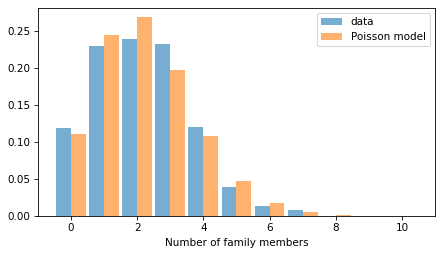

<IPython.core.display.Javascript object>

In [11]:
from thinkstats import two_bar_plots

two_bar_plots(pmf_family, pmf_poisson)
decorate(xlabel="Number of family members")

Comparing the PMFs, we can see where the data deviates from the model.
But PMFs tend to emphasize small differences that might be due to random variation.
Sometimes we can see the big picture more clearly by comparing CDFs.

For example, here's the CDF of family size compared to the CDF of the Poisson model.

In [12]:
cdf_family = pmf_family.make_cdf()
cdf_poisson = pmf_poisson.make_cdf()

<IPython.core.display.Javascript object>

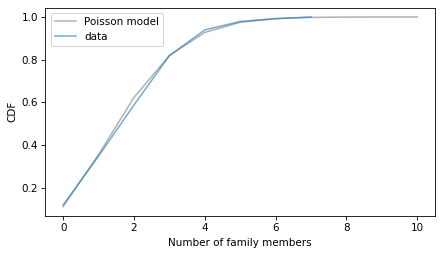

<IPython.core.display.Javascript object>

In [13]:
from thinkstats import two_cdf_plots

two_cdf_plots(cdf_poisson, cdf_family)
decorate(xlabel="Number of family members")

In my opinion, CDFs are usually the best way to compare data to a model, or compare data from different groups, etc.

Also, CDFs work well with continuous data.

In [14]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dct")
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/2002FemPreg.dat.gz")

<IPython.core.display.Javascript object>

In [15]:
from nsfg import read_fem_preg

preg = read_fem_preg()
birth_weights = preg["totalwgt_lb"].dropna()

<IPython.core.display.Javascript object>

In [16]:
from scipy.stats import trimboth

trimmed = trimboth(birth_weights, 0.01)

<IPython.core.display.Javascript object>

In [17]:
from thinkstats import make_normal_model

cdf_model = make_normal_model(trimmed)

<IPython.core.display.Javascript object>

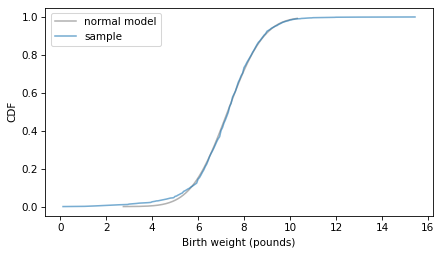

<IPython.core.display.Javascript object>

In [18]:
from empiricaldist import Cdf

cdf_birth_weight = Cdf.from_seq(birth_weights, name="sample")
two_cdf_plots(cdf_model, cdf_birth_weight, xlabel="Birth weight (pounds)")

## Probability Density

The familiar bell curve is actually the probability density function (PDF) of the normal distribution, which we can compute like this.

In [19]:
def normal_pdf(xs, mu, sigma):
    """Evaluates the normal probability density function.

    xs: float or sequence of floats
    mu: mean of the distribution
    sigma: standard deviation of the distribution

    returns: float or NumPy array of probability density
    """
    z = (xs - mu) / sigma
    return np.exp(-(z**2) / 2) / sigma / np.sqrt(2 * np.pi)

<IPython.core.display.Javascript object>

`thinkstats` provides a `NormalPdf` object that represents the PDF of a normal distribution.
We can use it to create a `NormalPdf` with the same mean and standard deviation as the birth weights in the NSFG dataset.

In [20]:
from thinkstats import NormalPdf

m, s = np.mean(trimmed), np.std(trimmed)
pdf_model = NormalPdf(m, s, name="normal model")
pdf_model

NormalPdf(7.280883100022579, 1.2430657948614345, name='normal model')

<IPython.core.display.Javascript object>

If we call the `NormalPdf` object as a function, it evaluates the normal PDF.

In [21]:
low = m - 4 * s
high = m + 4 * s
qs = np.linspace(low, high, 201)
ps = pdf_model(qs)

<IPython.core.display.Javascript object>

The result looks like a bell curve.

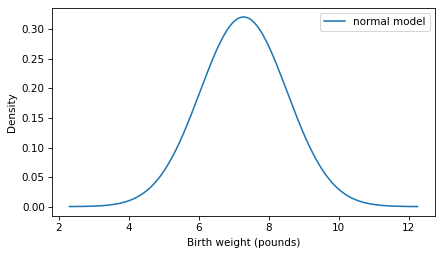

<IPython.core.display.Javascript object>

In [22]:
plt.plot(qs, ps, label="normal model")
decorate(xlabel="Birth weight (pounds)", ylabel="Density")

The `PdfNormal` object provides a `plot` function that does the same thing.

The peak of the distribution is at `m`.
If we evaluate the PDF there, the result is a probability density.

In [23]:
pdf_model(m)

0.32093416297880123

<IPython.core.display.Javascript object>

By itself, a probability density doesn't mean much -- most importantly, it is *not* a probability.
It would be incorrect to say that the probability is 32% that a randomly-chosen birth weight equals `m`.
In fact, the probability that a birth weight is truly, exactly, and precisely equal to `m` -- or any other specific value -- is effectively zero.

However, we can use these probability densities to compute the probability that a birth weight falls in an interval between two values, by computing the area under the curve.
The following function takes a `NormalPdf` object and the bounds of an interval, `low` and `high`.
It evaluates the normal PDF at equally-spaced quantities between `low` and `high`, and uses Simpson's method to estimate the area under the curve.

In [24]:
from scipy.integrate import simpson


def area_under(pdf, low, high):
    """Find the area under a PDF.

    pdf: Pdf object
    low: low end of the interval
    high: high end of the interval
    """
    qs = np.linspace(low, high, 501)
    ps = pdf(qs)
    return simpson(y=ps, x=qs)

<IPython.core.display.Javascript object>

If we compute the area under the curve from the lowest to the highest point in the graph, the result is close to 1.

In [25]:
area_under(pdf_model, 2, 12)

0.9999158086616793

<IPython.core.display.Javascript object>

If we extend the interval from negative infinity to positive infinity, the total area is exactly 1.

If we start from 0 -- or any value far below the mean -- we can compute the fraction of birth weights less than or equal to 8.5 pounds.

In [26]:
area_under(pdf_model, 0, 8.5)

0.8366380335513807

<IPython.core.display.Javascript object>

You might recall that the "fraction less than or equal to a given value" is the definition of the CDF.
So we could compute the same result using the CDF of the normal distribution.

In [27]:
from scipy.stats import norm

norm.cdf(8.5, m, s)

0.8366380358092718

<IPython.core.display.Javascript object>

Similarly, we can use the area under the density curve to compute the fraction of birth weights between 6 and 8 pounds.

In [28]:
area_under(pdf_model, 6, 8)

0.5671317752927691

<IPython.core.display.Javascript object>

Or we can get the same result using the CDF to compute the fraction less than 8 and then subtracting off the fraction less than 6. 

In [29]:
norm.cdf(8, m, s) - norm.cdf(6, m, s)

0.5671317752921801

<IPython.core.display.Javascript object>

So the CDF is the area under the curve of the PDF.
If you know calculus, another way to say the same thing is that the CDF is the integral of the PDF.
And conversely, the PDF is the derivative of the CDF.

## The Exponential PDF

To get your head around probability density, it might help to look at another example.
In the previous chapter, we used an exponential distribution to model the time until the first goal in a hockey game.
We used the following function to compute the exponential CDF.

In [30]:
def exponential_cdf(x, lam):
    """Compute the exponential CDF.

    x: float or sequence of floats
    lam: rate parameter

    returns: float or NumPy array of cumulative probability
    """
    return 1 - np.exp(-lam * x)

<IPython.core.display.Javascript object>

Where `lam` is the rate parameter in goals per unit of time.
We can compute the exponential PDF like this.


In [31]:
def exponential_pdf(x, lam):
    """Evaluates the exponential PDF.

    x: float or sequence of floats
    lam: rate parameter

    returns: float or NumPy array of probability density
    """
    return lam * np.exp(-lam * x)

<IPython.core.display.Javascript object>

`thinkstats` provides an `ExponentialPdf` object that uses this function to compute the exponential PDF.
We can use one to represent an exponential distribution with rate parameter 6 goals per game.

In [32]:
from thinkstats import ExponentialPdf

lam = 6
pdf_expo = ExponentialPdf(lam, name="model")
pdf_expo

ExponentialPdf(6, name='model')

<IPython.core.display.Javascript object>

`ExponentialPdf` provides a `plot` function we can use to plot the PDF -- notice that the unit of time is games here, rather than seconds as in the previous chapter.

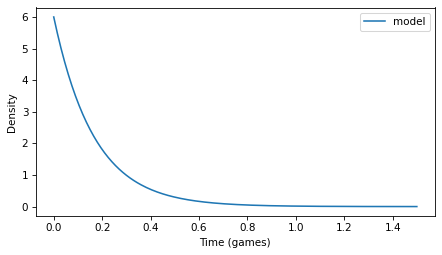

<IPython.core.display.Javascript object>

In [33]:
qs = np.linspace(0, 1.5, 201)
pdf_expo.plot(qs)
decorate(xlabel="Time (games)", ylabel="Density")

Looking at the y-axis, you might notice that some of these densities are greater than 1, which is a reminder that a probability density is not a probability.
But the area under a density curve is a probability, so it should never be greater than 1.

If we compute the area under this curve from 0 to 1.5 games, we can confirm that the result is close to 1.

In [34]:
area_under(pdf_expo, 0, 1.5)

0.999876590779019

<IPython.core.display.Javascript object>

If we extend the interval much farther, the result is slightly great than 1, but that's because we're approximating the area numerically.
Mathematically, it is exactly 1, as we can confirm using the exponential CDF.

In [35]:
from thinkstats import exponential_cdf

exponential_cdf(7, lam)

1.0

<IPython.core.display.Javascript object>

We can use the area under the density curve to compute the probability of a goal during any interval.
For example, here is the probability of a goal during the first minute of a 60-minute game.

In [36]:
area_under(pdf_expo, 0, 1 / 60)

0.09516258196404043

<IPython.core.display.Javascript object>

We can compute the same result using the exponential CDF.

In [37]:
exponential_cdf(1 / 60, lam)

0.09516258196404048

<IPython.core.display.Javascript object>

## Comparing PMFs and PDFs

It is a common error to compare the PMF of a sample with the PDF of a theoretical model.
For example, suppose we want to compare the distribution of birth weights to a normal model.
Here's a `Pmf` that represents the distribution of the data.

In [38]:
pmf_birth_weight = Pmf.from_seq(birth_weights, name="data")

<IPython.core.display.Javascript object>

And we already have `pdf_model`, which represents the PDF of the normal distribution with the same mean and standard deviation.
Here's what happens if we plot them on the same axis.

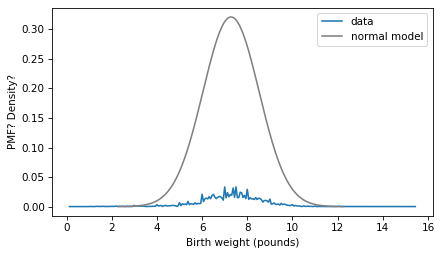

<IPython.core.display.Javascript object>

In [39]:
pmf_birth_weight.plot()
pdf_model.plot(color="gray")

decorate(xlabel="Birth weight (pounds)", ylabel="PMF? Density?")

It doesn't work very well.
One reason is that they are not in the same units.
A `Pmf` contains probability masses and a `NormalPdf` contains probability densities, so we can't compare them, and we shouldn't plot them on the same axes.

As a first attempt to solve the problem, we can make a `Pmf` that approximates the normal distribution by evaluating the PDF at a discrete set of points.
`NormalPdf` provides a `make_pmf` method that does that.

In [40]:
pmf_model = pdf_model.make_pmf()

<IPython.core.display.Javascript object>

The result contain probability masses, so we can at least plot it on the same axes as the PMF of the data.

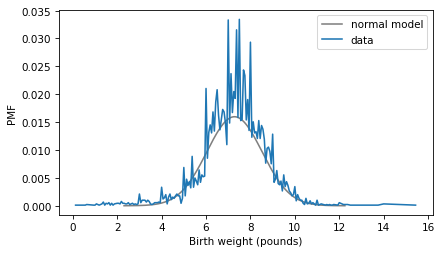

<IPython.core.display.Javascript object>

In [41]:
pmf_model.plot(color="gray")
pmf_birth_weight.plot()

decorate(xlabel="Birth weight (pounds)", ylabel="PMF")

But this is still not a good way to compare distributions.
One problem is that the two `Pmf` objects contains different numbers of quantities, and the quantities in `pmf_birth_weight` are not equally spaced, so the probability masses are not really comparable.

In [42]:
len(pmf_model), len(pmf_birth_weight)

(201, 184)

<IPython.core.display.Javascript object>

The other problem is that the `Pmf` of the data is noisy.

## Kernel Density Estimation

So let's try something else -- instead of converting the model to a PMF, we can convert the distribution of the data to a PDF.
To show how that works, I'll start with a small sample of the data.

In [43]:
np.random.seed(3)

n = 10
sample = birth_weights.sample(n)

<IPython.core.display.Javascript object>

The `Pmf` of this sample looks like this.

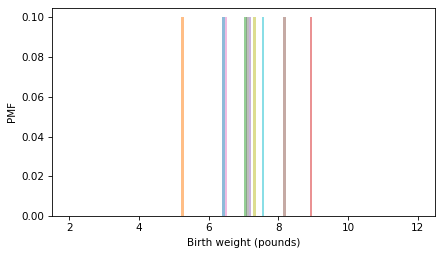

<IPython.core.display.Javascript object>

In [44]:
for weight in sample:
    pmf = Pmf.from_seq([weight]) / n
    pmf.bar(width=0.08, alpha=0.5)

xlim = [1.5, 12.5]
decorate(xlabel="Birth weight (pounds)", ylabel="PMF", xlim=xlim)

This way of representing the distribution treats the data as if it is discrete, so each probability mass is stacked up on a single point.
But birth weight is actually a continuous quantity, so the quantities between the measurements are also possible.
We can represent that possibility by replacing each discrete probability mass with a continuous probability density, like this.

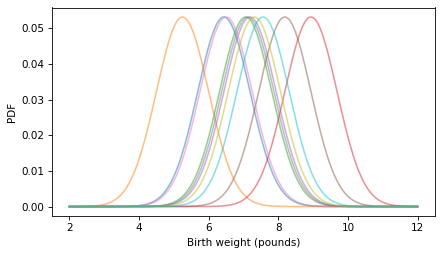

<IPython.core.display.Javascript object>

In [45]:
qs = np.linspace(2, 12, 201)

for weight in sample:
    ps = NormalPdf(weight, 0.75)(qs) / n
    plt.plot(qs, ps, alpha=0.5)

decorate(xlabel="Birth weight (pounds)", ylabel="PDF", xlim=xlim)

For each weight in the sample, we create a `NormalPdf` with the observed weight as the mean -- now let's add them up.

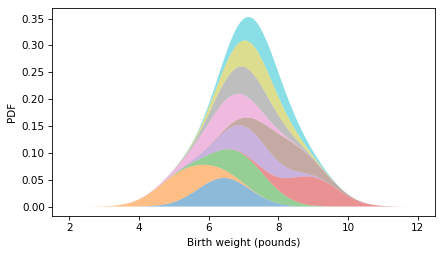

<IPython.core.display.Javascript object>

In [46]:
low_ps = np.zeros_like(qs)

for weight in sample:
    ps = NormalPdf(weight, 0.75)(qs) / n
    high_ps = low_ps + ps
    plt.fill_between(qs, low_ps, high_ps, alpha=0.5, lw=0)
    low_ps = high_ps

decorate(xlabel="Birth weight (pounds)", ylabel="PDF", xlim=xlim)

When we add up the probability densities for each data point, the result is an estimate of the probability density for the whole sample.
This process is called **kernel density estimation** or KDE.
In this context, a "kernel" is one of the small density functions we added up.
Because the kernels we used are normal distributions -- also known as Gaussians -- we could say more specifically that we computed a Gaussian KDE.

SciPy provides a function called `gaussian_kde` that implements this algorithm.
Here's how we can use it to estimate the distribution of birth weights.

In [47]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(birth_weights)

<IPython.core.display.Javascript object>

The result is an object that represents the estimated PDF, which we can evaluate by calling it like  a function.

In [48]:
ps = kde(qs)

<IPython.core.display.Javascript object>

Here's what the result looks like.

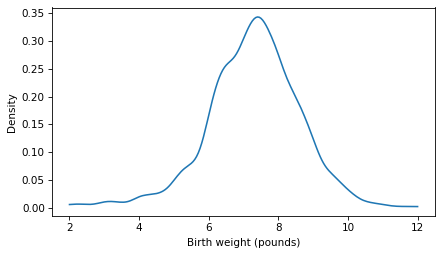

<IPython.core.display.Javascript object>

In [49]:
plt.plot(qs, ps)

decorate(xlabel="Birth weight (pounds)", ylabel="Density")

`thinkstats` provides a `Pdf` object that takes the result from `gaussian_kde`, and a domain that indicates where the density should be evaluated.
Here's how we make one.

In [50]:
from thinkstats import Pdf

domain = np.min(birth_weights), np.max(birth_weights)
kde_birth_weights = Pdf(kde, domain, name="data")

<IPython.core.display.Javascript object>

`Pdf` provides a `plot` method we can use to compare the estimated PDF of the sample to the PDF of a normal distribution.

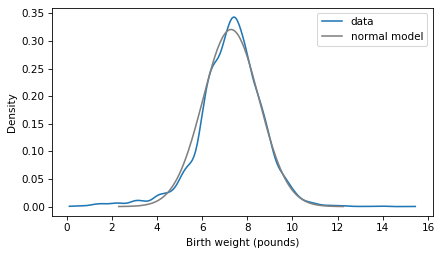

<IPython.core.display.Javascript object>

In [51]:
kde_birth_weights.plot()
pdf_model.plot(color="gray")

decorate(xlabel="Birth weight (pounds)", ylabel="Density")

KDE makes it possible to compare the distribution of a dataset to a theoretical model, and for some audiences, this is a good way to visualize the comparison.
But for continuous quantities, I think it's usually better to compare CDFs.

## The distribution framework

At this point we have a complete set of ways to represent distributions: PMFs, CDFs, and PDFs
The following figure shows these representations and the transitions from one to another.
For example, if we have a `Pmf`, we can use the `cumsum` function to compute the cumulative sum of the probabilities and get a `Cdf` that represents the same distribution.

<img width="400" src="https://github.com/AllenDowney/ThinkStats/raw/v3/figs/distribution_framework.png">

To demonstrate these transitions, we'll use a new dataset that "contains the time of birth, sex, and birth weight for each of 44 babies born in one 24-hour period at a Brisbane, Australia, hospital."

`thinkstats` provides a function that reads the data and returns a `DataFrame`.

In [52]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/babyboom.dat")

<IPython.core.display.Javascript object>

In [53]:
from thinkstats import read_baby_boom

boom = read_baby_boom()
boom.head()

,time,sex,weight_g,minutes
0,5,1,3837,5
1,104,1,3334,64
2,118,2,3554,78
3,155,2,3838,115
4,257,2,3625,177


<IPython.core.display.Javascript object>

The `minutes` records "the number of minutes since midnight for each birth".
So can use the `diff` method to compute the interval between each successive birth.

In [54]:
diffs = boom["minutes"].diff().dropna()

<IPython.core.display.Javascript object>

If births happen with equal probability during any minute of the day, we expect these intervals to follow an exponential distribution.
In reality, that assumption is not precisely true, but the exponential distribution might still be a good model for the data.

To find out, we'll start by making a `Pmf` that represents the distribution of intervals.

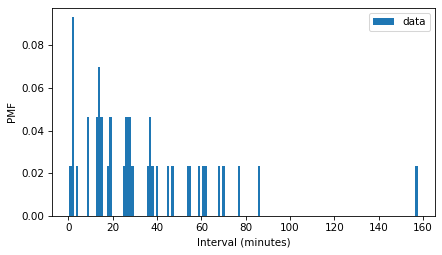

<IPython.core.display.Javascript object>

In [55]:
pmf_diffs = Pmf.from_seq(diffs, name="data")
pmf_diffs.bar(width=1)

decorate(xlabel="Interval (minutes)", ylabel="PMF")

The `make_cdf` method computes the cumulative sum of the probabilities in the `Pmf` and returns a `Cdf` object.

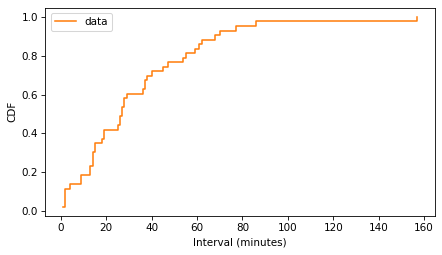

<IPython.core.display.Javascript object>

In [56]:
cdf_diffs = pmf_diffs.make_cdf()
cdf_diffs.step(color="C1")

decorate(xlabel="Interval (minutes)", ylabel="CDF")

The `Pmf` and `Cdf` are equivalent in the sense that if we are given either one, we can compute the other.
To demonstrate, we'll use the `make_pmf` method, which computes the differences between successive probabilities in a `Cdf` and returns a `Pmf`.

In [57]:
pmf_diffs2 = cdf_diffs.make_pmf()

<IPython.core.display.Javascript object>

The result should be identical to the original `Pmf`, but there might be small floating-point errors.
We can use `allclose` to check that the result is close to the original `Pmf`.

In [58]:
np.allclose(pmf_diffs, pmf_diffs2)

True

<IPython.core.display.Javascript object>

And it is.

From a `Pmf`, we can estimate a density function by calling `gaussian_kde` with the probabilities from the `Pmf` as weights.

In [59]:
kde = gaussian_kde(pmf_diffs.qs, weights=pmf_diffs.ps)

<IPython.core.display.Javascript object>

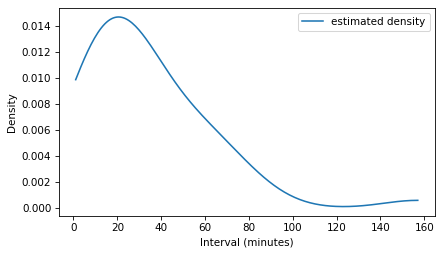

<IPython.core.display.Javascript object>

In [60]:
domain = np.min(pmf_diffs.qs), np.max(pmf_diffs.qs)
kde_diffs = Pdf(kde, domain=domain, name="estimated density")

kde_diffs.plot()
decorate(xlabel="Interval (minutes)", ylabel="Density")

To see whether the estimated density follows an exponential model, we can make an `ExponentialPdf` with the same mean as the data.

In [61]:
m = diffs.mean()
lam = 1 / m
pdf_model = ExponentialPdf(lam, name="exponential PDF")

<IPython.core.display.Javascript object>

Here's what it looks like compared to the estimated density.

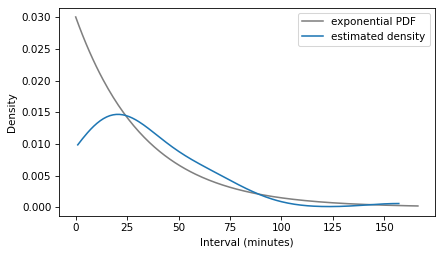

<IPython.core.display.Javascript object>

In [62]:
pdf_model.plot(color="gray")
kde_diffs.plot()
decorate(xlabel="Interval (minutes)", ylabel="Density")

Comparing the estimated density to an exponential PDF, it doesn't seem like the data fit the model well.
But that might be misleading -- again, I think comparing CDFs provides the clearer picture.

Here's the CDF of an exponential distribution compared to the CDF of the data.

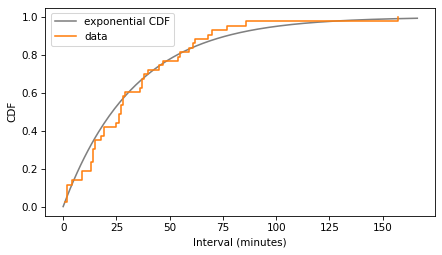

<IPython.core.display.Javascript object>

In [63]:
from thinkstats import ExponentialCdf

cdf_model = ExponentialCdf(lam, name="exponential CDF")
cdf_model.plot(color="gray")
cdf_diffs.step(color="C1")

decorate(xlabel="Interval (minutes)", ylabel="CDF")

The exponential CDF fits the CDF of the data well.

Given an `ExponentialPdf`, we can use `make_pmf` to **discretize** the PDF -- that is, to make a discrete approximation by evaluating the PDF at a sequence of equally spaced quantities.

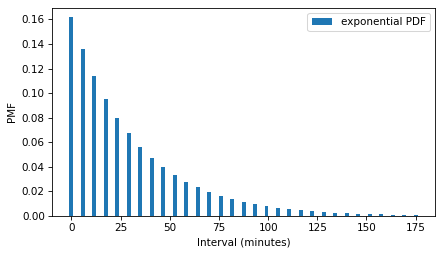

<IPython.core.display.Javascript object>

In [64]:
qs = np.linspace(0, 175, 31)
pmf_model = pdf_model.make_pmf(qs)
pmf_model.bar(width=2)

decorate(xlabel="Interval (minutes)", ylabel="PMF")

And given an `ExponentialCdf`, we can use `make_cdf` to make a discrete approximation of the exponential CDF.

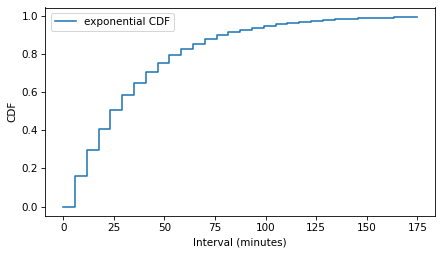

<IPython.core.display.Javascript object>

In [65]:
discrete_cdf_model = cdf_model.make_cdf(qs)
discrete_cdf_model.step()

decorate(xlabel="Interval (minutes)", ylabel="CDF")

Finally, to get from a discrete CDF to a continuous CDF, we can interpolate between the steps, which is what we see if we use the `plot` method instead of the `step` method.

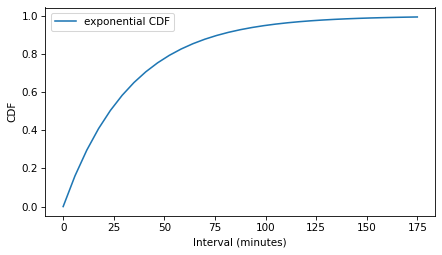

<IPython.core.display.Javascript object>

In [66]:
discrete_cdf_model.plot()

decorate(xlabel="Interval (minutes)", ylabel="CDF")

Finally, a PDF is the derivative of a continuous CDF, and a CDF is the integral of a PDF.

To demonstrate, we can use SymPy to define the CDF of an exponential distribution and compute its derivative.

In [67]:
import sympy as sp

x = sp.Symbol("x", real=True, positive=True)
λ = sp.Symbol("λ", real=True, positive=True)

cdf = 1 - sp.exp(-λ * x)
cdf

1 - exp(-x*λ)

<IPython.core.display.Javascript object>

In [68]:
pdf = sp.diff(cdf, x)
pdf

λ*exp(-x*λ)

<IPython.core.display.Javascript object>

And if we integrate the result, we get the CDF back -- although we lose the constant of integration in the process.

In [69]:
sp.integrate(pdf, x)

-exp(-x*λ)

<IPython.core.display.Javascript object>

## Glossary

-   **Probability density function (PDF)**: The derivative of a continuous CDF, a function that maps a value to its probability density.

-   **Probability density**: A quantity that can be integrated over a range of values to yield a probability. If the values are in units of cm, for example, probability density is in units of probability per cm.

-   **Kernel density estimation (KDE)**: An algorithm that estimates a PDF based on a sample.

-   **discretize**: To approximate a continuous function or distribution with a discrete function. The opposite of smoothing.



## Exercises

### Exercise

In World Cup soccer (football), suppose the time until the first goal is well modeled by an exponential distribution with rate parameter `lam=2.5` goals per game.
Make an `ExponentialPdf` to represent this distribution and use `area_under` to compute the probability a goal is scored in the first half of a game.
Then use an `ExponentialCdf` to compute the same probability and check that the results are consistent.

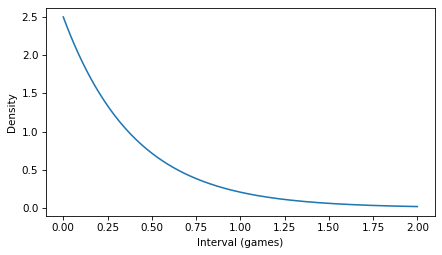

<IPython.core.display.Javascript object>

0.7134952031399646

<IPython.core.display.Javascript object>

0.7134952031398099

<IPython.core.display.Javascript object>

Use `ExponentialPdf` to compute the probability the first goal is scored in the second half of the game.
Then use an `ExponentialCdf` to compute the same probability and check that the results are consistent.

0.20441979823633566

<IPython.core.display.Javascript object>

0.2044197982362913

<IPython.core.display.Javascript object>

### Exercise

In order to join Blue Man Group, you have to be male between 5’10” and 6’1”, which is roughly 178 to 185 centimeters.
Let's see what fraction of the male adult population in the United States meets this requirement.

The heights of male participants in the BRFSS are well modeled by a normal distribution with mean 178 cm and standard deviation 7 cm.

In [75]:
download("https://github.com/AllenDowney/ThinkStats/raw/v3/data/CDBRFS08.ASC.gz")

<IPython.core.display.Javascript object>

In [76]:
from thinkstats import read_brfss

brfss = read_brfss()
male = brfss.query("sex == 1")
heights = male["htm3"].dropna()

<IPython.core.display.Javascript object>

In [77]:
from scipy.stats import trimboth

trimmed = trimboth(heights, 0.01)
m, s = np.mean(trimmed), np.std(trimmed)
m, s

(178.10278947124948, 7.017054887136004)

<IPython.core.display.Javascript object>

Here's a `NormalCdf` object that represents a normal distribution with the same mean and standard deviation as the trimmed data.

In [78]:
from thinkstats import NormalCdf

cdf_normal_model = NormalCdf(m, s)

<IPython.core.display.Javascript object>

And here's how it compares to the CDF of the data.

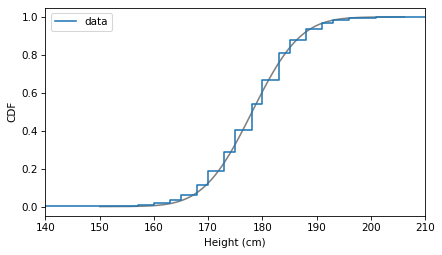

<IPython.core.display.Javascript object>

In [79]:
cdf_height = Cdf.from_seq(heights, name="data")
cdf_normal_model.plot(color="gray")
cdf_height.step()

xlim = [140, 210]
decorate(xlabel="Height (cm)", ylabel="CDF", xlim=xlim)

Use `gaussian_kde` to make an `Pdf` to represent the PDF of male height.
Hint: Investigate the `bw_method` argument, which can be used to control the smoothness of the estimated density.

Plot the estimated density and compare it to a `NormalPdf` with mean `m` and standard deviation `s`.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

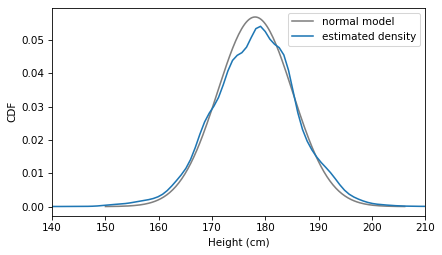

<IPython.core.display.Javascript object>

Use a `NormalPdf` and `area_under` to compute the fraction of people in the normal model that are between 178 and 185 centimeters.
Use a `NormalCdf` to compute the same fraction, and check that the results are consistent.
Finally, use the empirical `Cdf` of the data to see what fraction of people in the dataset are in the same range.

0.343020541679175

<IPython.core.display.Javascript object>

0.34302054167913015

<IPython.core.display.Javascript object>

0.3354705421386336

<IPython.core.display.Javascript object>

[Think Stats: Exploratory Data Analysis in Python, 3rd Edition](https://allendowney.github.io/ThinkStats/index.html)

Copyright 2024 [Allen B. Downey](https://allendowney.com)

Code license: [MIT License](https://mit-license.org/)

Text license: [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International](https://creativecommons.org/licenses/by-nc-sa/4.0/)